In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
path_data = "./data/PIN_MLE_new_40.txt"
df = pd.read_csv(path_data)

# Tables

In [3]:
df.describe()

,alpha,delta,epsilon_b,epsilon_s,mu,buy,sell,MLE
count,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07
mean,4.949932e-01,4.949348e-01,1.994983e+02,1.995064e+02,1.995109e+02,2.483999e+02,2.493745e+02,-9.019544e+00
std,2.857504e-01,2.857741e-01,5.772795e+01,5.773391e+01,5.773957e+01,1.084754e+02,1.089912e+02,1.266127e+00
min,2.815410e-08,3.466760e-08,1.000000e+02,1.000000e+02,1.000000e+02,5.500000e+01,5.800000e+01,-2.517582e+01
25%,2.476042e-01,2.474808e-01,1.500000e+02,1.500000e+02,1.490000e+02,1.650000e+02,1.660000e+02,-9.668570e+00
50%,4.950085e-01,4.948922e-01,1.990000e+02,2.000000e+02,2.000000e+02,2.300000e+02,2.310000e+02,-8.784786e+00
75%,7.424677e-01,7.423741e-01,2.490000e+02,2.500000e+02,2.500000e+02,2.950000e+02,2.960000e+02,-8.111532e+00
max,9.900000e-01,9.900000e-01,2.990000e+02,2.990000e+02,2.990000e+02,6.900000e+02,6.940000e+02,-6.462882e+00


In [4]:
print(df["buy"].max(), df["buy"].min())

690 55


In [5]:
print(df["sell"].max(), df["sell"].min())

694 58


In [6]:
df.corr()

,alpha,delta,epsilon_b,epsilon_s,mu,buy,sell,MLE
alpha,1.000000,-0.000092,-0.000038,0.000153,0.000107,0.260252,0.264019,-0.201528
delta,-0.000092,1.000000,0.000013,0.000085,0.000177,0.260205,-0.258963,-0.003325
epsilon_b,-0.000038,0.000013,1.000000,0.000062,0.000095,0.000108,0.529732,-0.105578
epsilon_s,0.000153,0.000085,0.000062,1.000000,0.000019,0.532243,0.000076,-0.105676
mu,0.000107,0.000177,0.000095,0.000019,1.000000,0.130893,0.132498,-0.029999
buy,0.260252,0.260205,0.000108,0.532243,0.130893,1.000000,-0.206224,-0.226872
sell,0.264019,-0.258963,0.529732,0.000076,0.132498,-0.206224,1.000000,-0.225162
MLE,-0.201528,-0.003325,-0.105578,-0.105676,-0.029999,-0.226872,-0.225162,1.000000


In [7]:
df_1000 = df.head(1000)

## Computation of errors

<AxesSubplot:>

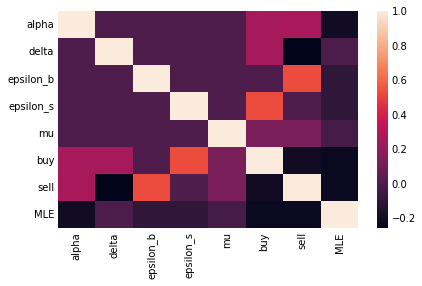

In [8]:
sns.heatmap(df.corr())

In [9]:
df['e_alpha'] = (df['alpha']-df['alpha'])/(np.max(df['alpha']) - np.min(df['alpha']))

# Graphs

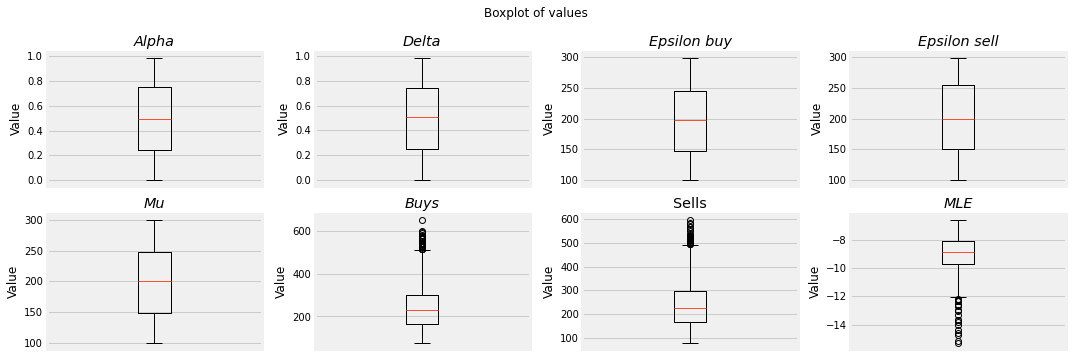

In [10]:

fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Boxplot of values')
axs[0, 0].boxplot(df_1000["alpha"])
axs[0, 0].set_title("Alpha",style='italic')
axs[0, 1].boxplot(df_1000["delta"])
axs[0, 1].set_title("Delta",style='italic')
axs[0, 2].boxplot(df_1000["epsilon_b"])
axs[0, 2].set_title("Epsilon buy",style='italic')
axs[0, 3].boxplot(df_1000["epsilon_s"])
axs[0, 3].set_title("Epsilon sell",style='italic')
axs[1, 0].boxplot(df_1000["mu"])
axs[1, 0].set_title("Mu",style='italic')
axs[1, 1].boxplot(df_1000["buy"])
axs[1, 1].set_title("Buys",style='italic')
axs[1, 2].boxplot(df_1000["sell"])
axs[1, 2].set_title("Sells")
axs[1, 3].boxplot(df_1000["MLE"])
axs[1, 3].set_title("MLE",style='italic')

for ax in axs.flat:
    ax.set(ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    #ax.label_outer()
    ax.set_xticks([])
    
plt.tight_layout()

In [5]:
df_ei = pd.read_csv("./results/table/ei_results.csv")

df_ei.describe().to_latex("./results/table/stat_desc_ei.tex")
df_ei.describe()


/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_37404/1210735849.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ei.describe().to_latex("./results/table/stat_desc_ei.tex")


,alpha,delta,epsilon_b,epsilon_s,mu
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.958937e-01,0.275057,1.566379e-04,1.473877e-04,1.400994e-04
std,2.355067e+00,2.975318,9.258024e-04,8.891690e-04,1.375245e-03
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.607187e-17,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.601854e-04,0.000127,1.467920e-07,1.425022e-07,3.287183e-08
75%,7.255919e-03,0.003097,2.334957e-06,2.294204e-06,1.157727e-06
max,5.880447e+01,83.418599,1.417955e-02,1.291568e-02,3.762209e-02


In [6]:
df_ei.shape

(1000, 5)

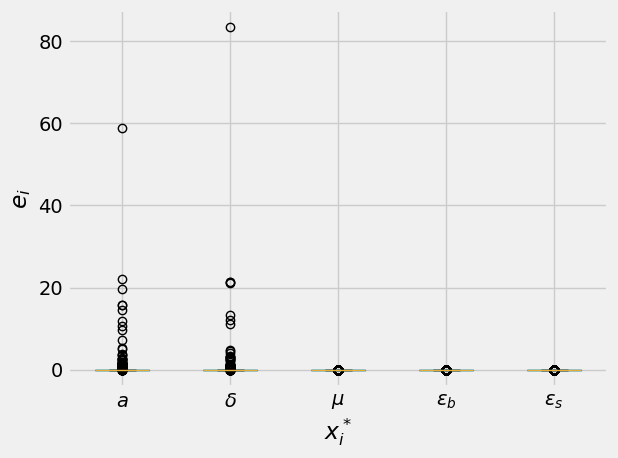

In [9]:
df_ei.boxplot()
plt.xticks([1, 2, 3,4,5], [r'$a$', r'$\delta$', r'$\mu$', r'$\epsilon_b$', r'$\epsilon_s$'])
#plt.title(r"Boxplot of $e_i$ by parameters")
plt.ylabel(r"$e_i$")
plt.xlabel(r"$x_i^*$")
plt.tight_layout()
plt.savefig("./results/graphs/boxplot_ei.png")

In [8]:
# à voir s'il il faut le faire
df_ei_test = df_ei[df_ei <= df_ei.quantile(0.75)]
df_ei_test = df_ei_test.dropna()
df_ei_test.shape

(687, 5)

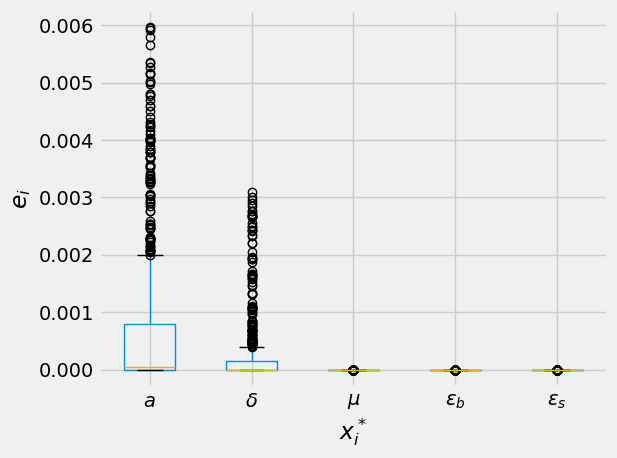

In [10]:
df_ei_test.boxplot()
plt.xticks([1, 2, 3,4,5], [r'$a$', r'$\delta$', r'$\mu$', r'$\epsilon_b$', r'$\epsilon_s$'])
plt.ylabel(r"$e_i$")
plt.xlabel(r"$x_i^*$")
#plt.title(r"Boxplot of $e_i$ by parameters")
plt.tight_layout()
plt.savefig("./results/graphs/boxplot_ei_q3.png")

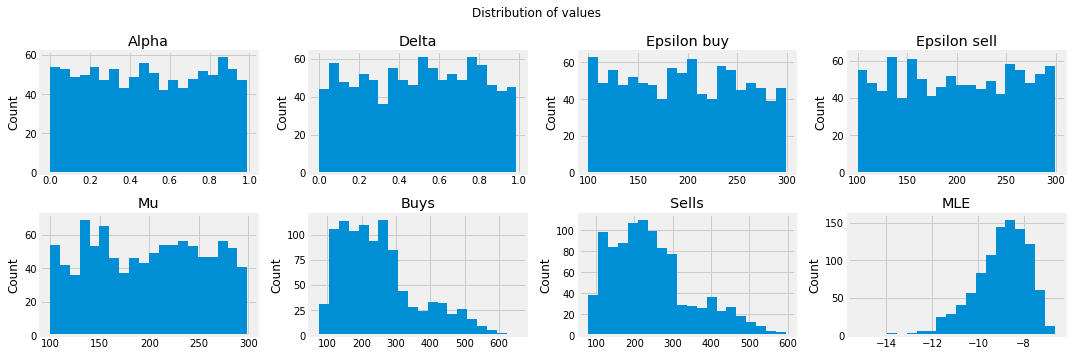

In [16]:
fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Distribution of values')
axs[0, 0].hist(df_1000["alpha"],20)
axs[0, 0].set_title("Alpha")
axs[0, 1].hist(df_1000["delta"],20)
axs[0, 1].set_title("Delta")
axs[0, 2].hist(df_1000["epsilon_b"],20)
axs[0, 2].set_title("Epsilon buy")
axs[0, 3].hist(df_1000["epsilon_s"],20)
axs[0, 3].set_title("Epsilon sell")
axs[1, 0].hist(df_1000["mu"],20)
axs[1, 0].set_title("Mu")
axs[1, 1].hist(df_1000["buy"],20)
axs[1, 1].set_title("Buys")
axs[1, 2].hist(df_1000["sell"],20)
axs[1, 2].set_title("Sells")
axs[1, 3].hist(df_1000["MLE"],20)
axs[1, 3].set_title("MLE")

for ax in axs.flat:
    ax.set(ylabel='Count')
plt.tight_layout()

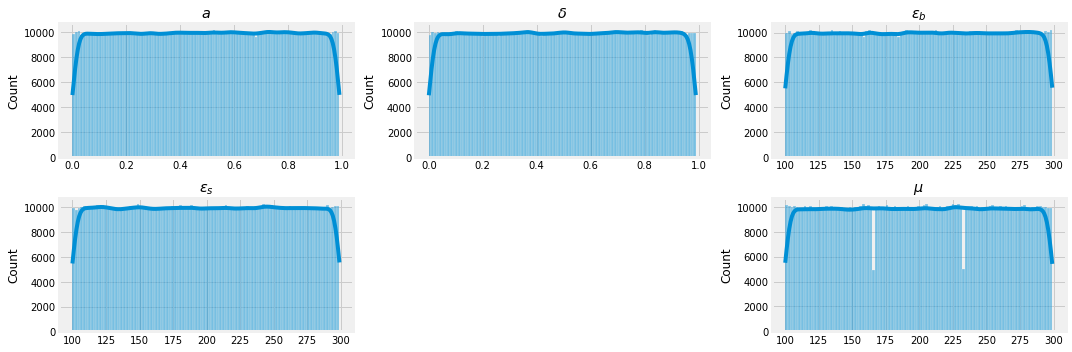

In [23]:
df_1000 = df.head(1000000)
fig, axs = plt.subplots(2, 3,figsize=(15,5))

sns.histplot(df_1000["alpha"],kde=True,ax=axs[0, 0])
axs[0, 0].set_title(r"$a$",style='italic')
sns.histplot(df_1000["delta"],kde=True,ax=axs[0, 1])
axs[0, 1].set_title(r"$\delta$",style='italic')
sns.histplot(df_1000["epsilon_b"],kde=True,ax=axs[0, 2])
axs[0, 2].set_title(r"$\epsilon_b$",style='italic')
sns.histplot(df_1000["epsilon_s"],kde=True,ax=axs[1, 0])
axs[1, 0].set_title(r"$\epsilon_s$",style='italic')
sns.histplot(df_1000["mu"],kde=True,ax=axs[1, 2])
axs[1, 2].set_title(r"$\mu$",style='italic')
axs[1, 1].set_visible(False)
for ax in axs.flat:
    ax.set(ylabel='Count',xlabel='')
plt.tight_layout()
plt.savefig("./results/graphs/dist_parameters.png")

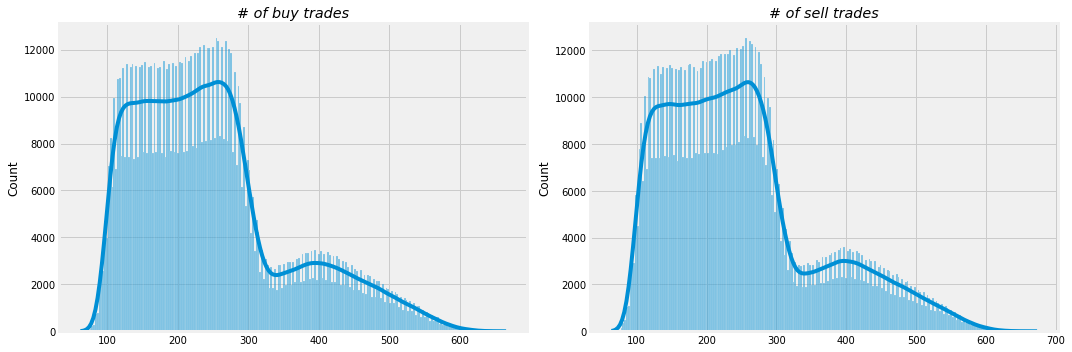

In [24]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
#fig.suptitle('Distribution of values')
sns.histplot(df_1000["buy"],kde=True,ax=axs[0])
axs[0].set_title(r"# of buy trade",style='italic')
sns.histplot(df_1000["sell"],kde=True,ax=axs[1])
axs[1].set_title(r"# of sell trade",style='italic')
for ax in axs.flat:
    ax.set(ylabel='Count',xlabel='')

plt.tight_layout()
plt.savefig("./results/graphs/dist_b_s.png")

Text(0, 0.5, 'Number of buys trade')

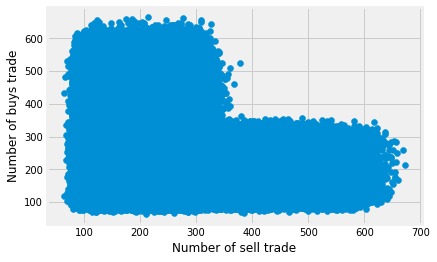

In [25]:
plt.scatter(df_1000['sell'],df_1000['buy'])
plt.plot(df_1000['sell'],df_1000['buy'])
plt.xlabel("Number of sell trade")
plt.ylabel("Number of buys trade")

<AxesSubplot:>

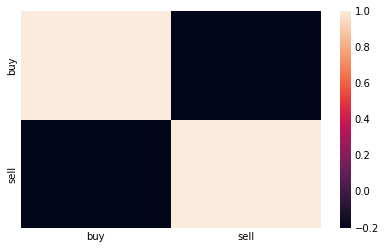

In [27]:
sns.heatmap(df[['buy','sell']].corr())

# Comparison graphs

In [20]:
df_pred = pd.read_csv("./results/table/model_pred_1000.csv",names=["pred"])
df_pred = df_pred.iloc[1:,:]

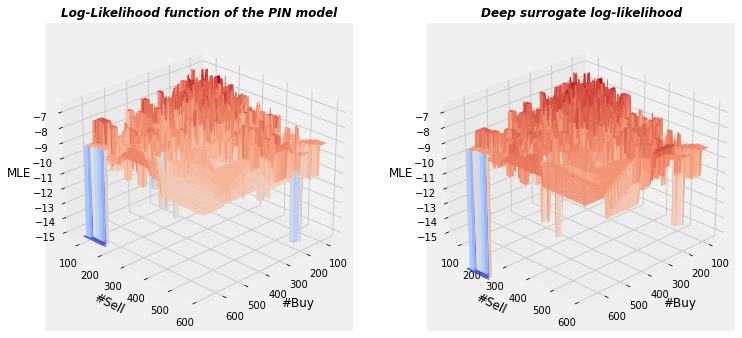

In [21]:

def make_surf_plot(X, Y, Z, ax):
        """
        Create a volatility surface plot
        """
        XX, YY = np.meshgrid(np.linspace(min(X), max(X), 230), np.linspace(min(Y), max(Y), 230))
        ZZ = griddata(np.array([X, Y]).T, np.array(Z), (XX, YY), method='nearest')

        ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm, linewidth=0)
        ax.view_init(25, 45)
        ax.set_xlabel('#Buy')
        ax.set_ylabel('#Sell')
        ax.set_zlabel('MLE')
        plt.tight_layout()
        return fig, ax

fig = plt.figure(figsize=[6.4 * 2, 4.8])
ax = fig.add_subplot(1, 2, 1, projection='3d')

fig, ax = make_surf_plot(df_1000['buy'], df_1000['sell'], df_1000['MLE'], ax)
ax.set_title(r"Log-Likelihood function of the PIN model", fontsize=12, fontweight='bold',style='italic')
bottom,top = ax.get_zlim()
ax = fig.add_subplot(1, 2, 2, projection='3d')

fig, ax = make_surf_plot(df_1000['buy'], df_1000['sell'], df_pred['pred'], ax)
ax.set_title(r"Deep surrogate log-likelihood", fontsize=12, fontweight='bold',style='italic')
ax.set_zlim(bottom,top)
plt.savefig("./results/graphs/3d_comparison_model_surrogate.png")

## Create graphs for methodology part

In [22]:
import tensorflow as tf
import numpy as np

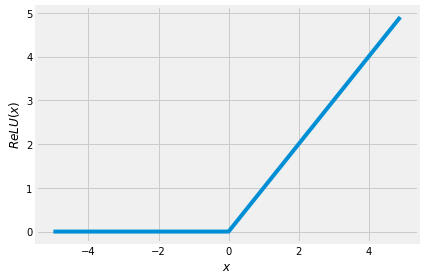

In [23]:
x = np.arange(-5,5,0.1)
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_swish = tf.nn.swish(x)
plt.xlabel(r"$x$")
plt.ylabel(r"$ReLU(x)$")
plt.plot(x,y_relu)
plt.grid(True)
plt.tight_layout()
plt.savefig("./results/graphs/relu.png")

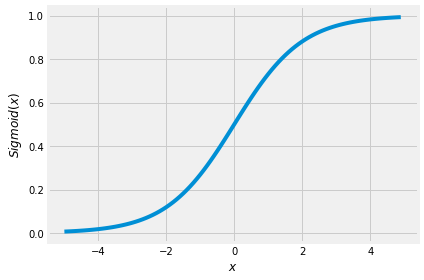

In [32]:
plt.xlabel(r"$x$")
plt.ylabel(r"$Sigmoid(x)$")
plt.plot(x,y_sigmoid)
plt.grid(True)
plt.tight_layout()
plt.savefig("./results/graphs/sigmoid.png")

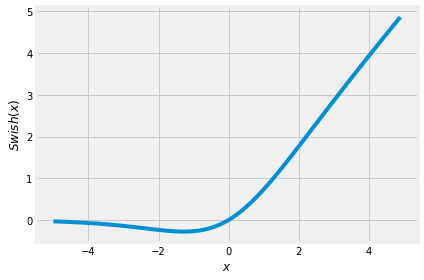

In [28]:
plt.xlabel(r"$x$")
plt.ylabel(r"$Swish(x)$")
plt.plot(x,y_swish)
plt.tight_layout()

plt.savefig("./results/graphs/swish.png")

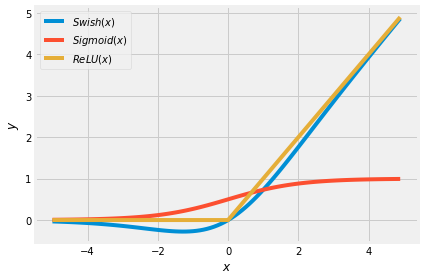

In [31]:
plt.plot(x,y_swish)
plt.plot(x,y_sigmoid)
plt.plot(x,y_relu)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend([r'$Swish(x)$',r'$Sigmoid(x)$',r'$ReLU(x)$'])
plt.grid(True)
plt.tight_layout()
plt.savefig("./results/graphs/activ_functs_comparison.png")